# Guided Project: Predicting Car Prices

 In this guided project, we will predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile), and the data can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [3]:
import pandas as pd
import numpy as np

In [4]:
col_names = cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = col_names)

In [5]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Data preparation

In [6]:
cars['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

Some rows contain question marks '?', these have to be replaced as nans

In [7]:
cars.replace('?', np.nan, inplace = True)

Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). We will now search for such columns and convert them to the correct data types.

In [8]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Looking at the data types above:

Columns such as 'num-of-doors' and 'num-of-cylinders' as object does not make much sense, as they are supposed to be numeric and not strings. Lets look at this columns to see what the problem might be. 

The columns 'bore', 'stroke', 'horsepower', 'peak_rpm, and 'price' will have to be converted to numeric types. 

In [9]:
cars['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [10]:
cars['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
# replace these strings with their corresponding numbers
dex = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
cols = ['num-of-doors', 'num-of-cylinders']
cars[cols] =cars[cols].replace(dex)

In [12]:
# convert to numeric
num_cols = ['bore', 'normalized-losses', 'horsepower', 'stroke', 'peak-rpm', 'price']
cars[num_cols] = cars[num_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


### Handling missing value

In [14]:
cars['normalized-losses'].isnull().sum()

41

In [15]:
cars.shape

(205, 26)

Alomost a quarter of the total rows in this column is missing. Will loose too much data by dropping rows with missing values. However, losses due to insurance is very important when predicting a cars market price. We should instead drop this column.

In [16]:
cars.drop('normalized-losses', axis = 'columns', inplace = True)

In [17]:
cars.isnull().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

Lets drop rows with missing values in this case

In [18]:
cars.dropna(inplace = True)

### Normalize all numeric columns except target column (price)

In [19]:
# Select all the numeric columns
numeric_cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price','num-of-doors','num-of-cylinders']
numeric_cars = cars[numeric_cols]

In [20]:
price = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.mean())/ numeric_cars.std()
numeric_cars['price'] = price

In [21]:
numeric_cars.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price,num-of-doors,num-of-cylinders
0,-1.678015,-0.442872,-0.839080,-2.117092,-0.025646,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,13495.0,-1.172839,-0.410180
1,-1.678015,-0.442872,-0.839080,-2.117092,-0.025646,0.045098,0.511697,-1.803495,-0.287525,0.198054,-0.212806,-0.677292,-0.555613,16500.0,-1.172839,-0.410180
2,-0.719041,-0.250543,-0.184200,-0.613816,0.496473,0.574066,-2.388614,0.701095,-0.287525,1.330822,-0.212806,-0.990387,-0.702307,16500.0,-1.172839,1.544506
3,0.142410,0.182198,0.143240,0.179580,-0.426254,-0.459826,-0.516262,0.479169,-0.036110,-0.039037,0.853987,-0.207649,-0.115531,13950.0,0.848214,-0.410180
4,0.077395,0.182198,0.236794,0.179580,0.498371,0.189362,-0.516262,0.479169,-0.538940,0.303427,0.853987,-1.146935,-1.289083,17450.0,0.848214,0.567163


### Univariate KNeighbors classification

We create a function, named knn_train_test() that encapsulates the training and simple validation process. This function will have 3 parameters -- training column name, target column name, and the dataframe object.

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [23]:
# Function to train and test a univariate model
def knn_train_test(train_col, target_col, df):
    split_no = round(len(df) * 0.75)
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train = rand_df[:split_no]
    test = rand_df[split_no:]
    model = KNeighborsRegressor()
    model.fit(train[[train_col]], train[target_col])
    preds = model.predict(test[[train_col]])
    rmse = (mean_squared_error(test[target_col], preds))**0.5
    return rmse 

In [24]:
numeric_cars_vars = numeric_cars.drop('price', axis = 'columns')
result = {}
for cols in numeric_cars_vars.columns:
    res = knn_train_test(cols,'price',numeric_cars)
    result[cols] = res

In [25]:
result

{'bore': 4610.4156534416725,
 'city-mpg': 2994.1212153986016,
 'compression-rate': 5191.419874096745,
 'curb-weight': 2531.7903089184406,
 'engine-size': 2173.4207630675965,
 'height': 6133.687500666571,
 'highway-mpg': 2723.012901640387,
 'horsepower': 2312.6410243485693,
 'length': 2465.236360540979,
 'num-of-cylinders': 4133.632740802373,
 'num-of-doors': 8498.947787520523,
 'peak-rpm': 7132.430705703819,
 'stroke': 4622.480034930744,
 'wheel-base': 5866.883628611246,
 'width': 3175.711407438235}

Using default k-value for univariate classification, the engine-size column produced the best result with the lowest RMSE value of ~2173, others scored higher.

### Univariate classification with varying k-values

Lets modify the function above to accept varying k- values. So we can see the best models achieved from using different k-values.

In [26]:
# Function to train and test a univariate model
def knn_train_test2(train_col, target_col, df):
    split_no = round(len(df) * 0.75)
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train = rand_df[:split_no]
    test = rand_df[split_no:]

    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train[[train_col]], train[target_col])
        pred = model.predict(test[[train_col]])
        mse = mean_squared_error(test[target_col], pred)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses


In [27]:
results2 = {}

for col in numeric_cars_vars.columns:
    rmse_val = knn_train_test2(col, 'price', numeric_cars)
    results2[col] = rmse_val

results2

{'bore': {1: 11075.227218323786,
  3: 4649.359285308987,
  5: 4610.4156534416725,
  7: 4701.599763653328,
  9: 4727.076910501706},
 'city-mpg': {1: 4237.879528235003,
  3: 2842.22744181716,
  5: 2994.1212153986016,
  7: 3053.4319219037257,
  9: 3087.88499040877},
 'compression-rate': {1: 4992.805565678145,
  3: 5860.1981489457685,
  5: 5191.419874096745,
  7: 5414.832852466737,
  9: 5786.497805395925},
 'curb-weight': {1: 2667.2855427694026,
  3: 2340.184385541732,
  5: 2531.7903089184406,
  7: 2674.6373130534075,
  9: 2669.324827165441},
 'engine-size': {1: 3134.3663268407754,
  3: 2340.742910420789,
  5: 2173.4207630675965,
  7: 2268.839717121903,
  9: 2479.2547058753235},
 'height': {1: 6858.126060557651,
  3: 7134.092984765322,
  5: 6133.687500666571,
  7: 5184.018599188731,
  9: 5508.230111866949},
 'highway-mpg': {1: 3735.835811211908,
  3: 3701.8726648619145,
  5: 2723.012901640387,
  7: 2748.077151580249,
  9: 2791.7443909393933},
 'horsepower': {1: 2648.915245749978,
  3: 2270

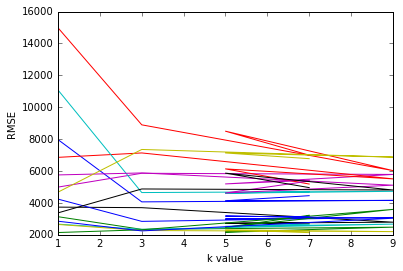

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in results2.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

From the plot above, higher k-values tend to perform better. Particularly those between 3 and above k-folds

### Multivariate KNeighbors classification

In [29]:
# Function to train and test a multivariate model

def knn_train_test_multi(train_cols, target_col, df):
    split_no = round(len(df) * 0.5)
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train = rand_df[:split_no]
    test = rand_df[split_no:]
    model = KNeighborsRegressor()
    model.fit(train[train_cols], train[target_col])
    preds = model.predict(test[train_cols])
    rmse = (mean_squared_error(test[target_col], preds))**0.5
    return rmse 

In [30]:
# Using the function above with all the variables
features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'num-of-doors', 'num-of-cylinders']

res_all = knn_train_test_multi(features, 'price', numeric_cars)


# Using the best two features from the univariate default k-value function
feat2 = ['engine-size', 'horsepower']
res2 = knn_train_test_multi(feat2, 'price', numeric_cars)


# Using the best three features from the univariate default k-value function
feat3 = ['engine-size', 'horsepower', 'length']
res3 = knn_train_test_multi(feat3, 'price', numeric_cars)


# Using the best four features from the univariate default k-value function
feat4 = ['engine-size', 'horsepower', 'length','curb-weight']
res4 = knn_train_test_multi(feat4, 'price', numeric_cars)


# Using the best five features from the univariate default k-value function
feat5 = ['engine-size', 'horsepower', 'length','curb-weight','highway-mpg']
res5 = knn_train_test_multi(feat5, 'price', numeric_cars)

results_multivar = {'all_features':round(res_all,2),
                    'two_features':round(res2,2), 
                    'three_features':round(res3,2), 
                    'four_features':round(res4,2), 
                    'five_features':round(res5,2)}

for key, value in results_multivar.items():
    print(key, ' : ', value)

two_features  :  3238.69
all_features  :  4633.8
five_features  :  3845.9
three_features  :  3757.19
four_features  :  3704.34


This results indicates that the model with two_feature performed best, This best model can be tuned to perform even better by selecting the best k-value. We will vary the k-value between 1 and 25 for the top three models above to find the best hyper-parameter setting.

### Seeking the best model by varying k hyperparameter

In [36]:
# Function to train and test a multivariate model with varying k-values
def knn_train_test2_multi(train_cols, target_col, df):
    split_no = round(len(df) * 0.5)
    np.random.seed(0)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train = rand_df[:split_no]
    test = rand_df[split_no:]

    k_rmses = {}
    
    for k in range(1,26):
        # Fit model using k nearest neighbors.
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train[train_cols], train[target_col])
        pred = model.predict(test[train_cols])
        mse = mean_squared_error(test[target_col], pred)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [47]:
# The best performing model
best_mod =knn_train_test2_multi(feat2,'price',numeric_cars)

# 2nd best performing model
second_best = knn_train_test2_multi(feat4, 'price', numeric_cars)

# 3rd best performing model
third_best = knn_train_test2_multi(feat3, 'price', numeric_cars)

best_models = {'best model':best_mod,
              'second best model':second_best,
              'third best model':third_best
              }

In [49]:
best_models

{'best model': {1: 3048.3625602885677,
  2: 3127.0202681997375,
  3: 3095.330646288226,
  4: 3293.7853473327805,
  5: 3238.6925983167575,
  6: 3252.361346759752,
  7: 3345.190868982869,
  8: 3535.0224362795775,
  9: 3757.336544616072,
  10: 3974.359740824242,
  11: 4178.878034726736,
  12: 4167.775188271822,
  13: 4185.583106910495,
  14: 4325.286158350686,
  15: 4261.221866055859,
  16: 4259.238930441857,
  17: 4319.958061108261,
  18: 4422.991292672199,
  19: 4517.804857679555,
  20: 4631.836701908254,
  21: 4698.494800333434,
  22: 4765.376092225417,
  23: 4803.856937402052,
  24: 4863.532499282952,
  25: 4873.501676868618},
 'second best model': {1: 3016.161852352693,
  2: 3224.5864583415328,
  3: 3590.3669446521567,
  4: 3817.508237371192,
  5: 3704.3411264394817,
  6: 3951.3797488021805,
  7: 4134.2003657554,
  8: 4322.773059093579,
  9: 4380.994908806551,
  10: 4355.728447664503,
  11: 4375.756783777461,
  12: 4451.554595669627,
  13: 4494.65014692673,
  14: 4538.93720955336,
  

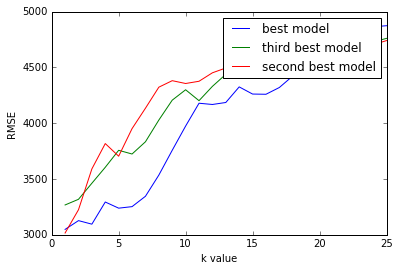

In [50]:
for k,v in best_models.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

### Conclusion

Finally, by varying the k-values of the three best models above the optimal k-values were generally between 1 to about 4 or thereabout. K-values from 5 and above seem to perform generally worse.